## 0. Simulate dataset 

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 1000
X= np.random.uniform(0,1,size = (samples,2))

epsilon = np.random.normal(0,1, size = samples)
print(epsilon.shape, X.shape)

x_1= X[:,0]
x_2= X[:,1]

y = (3*x_1+5* x_2+ 3 +epsilon).reshape(-1,1)

y.shape

(1000,) (1000, 2)


(1000, 1)

In [ ]:
X = np.c_[np.ones(samples),X]
X[:5]

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

## 1. Gradient descent - learning rate 

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and calculate $\vec{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\vec{\theta}$ for epochs = 1
- calculate $\vec{\theta}$ for epochs = 6
- ...
- calculate $\vec{\theta}$ for epochs = 496

Plot these $\vec{\theta}$ values against epochs. 



In [ ]:
# Train | test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 3), (330, 3), (670, 1), (330, 1))

In [ ]:
 # Batch gradient desecent

np.random.seed(42)
def gradient_descent(X,y, learning_rate =  .1, epochs = 100):
    m = len(X)
    theta = np.random.rand(X.shape[1],1) # [beta_0, beta_1]^T

    for _ in range(epochs):
        gradient = 2/ m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient # learning_rate is eta in theory
    return theta

theta = gradient_descent(X_train, y_train, epochs=500)
theta.reshape(-1) # throws away additional dimension

array([3.06965567, 3.03347135, 4.81905831])

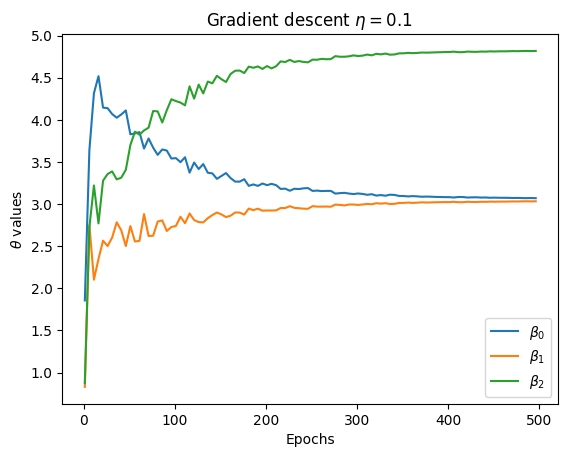

In [ ]:
steps = range(1,500,5)
thetas = np.array([gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in steps])

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$",r"$\beta_2$" ])
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title ="Gradient descent $\eta = 0.1$ ")
ax.legend()

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? 


In [ ]:
steps = range(1,5000,20)
thetas = np.array([gradient_descent(X, y,learning_rate =  0.01, epochs=epoch).reshape(-1) for epoch in steps])

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$",r"$\beta_2$" ])
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title ="Gradient descent $\eta = 0.01$ ")
ax.legend()

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.
